## Minor Irrigation Census - Village Schedule - Uttar Pradesh

## DESCRIPTION

This large-scale irrigation and groundwater analysis project represents a significant achievement in utilizing Apache Spark for processing and analyzing the Minor Irrigation Census data of Uttar Pradesh. The project showcases how modern big data frameworks can transform conventional irrigation and agricultural assessments into a scalable, insightful, and data-driven analytical system.

By integrating distributed computing principles with comprehensive data cleaning, transformation, and visualization, this project successfully establishes a robust foundation for sustainable water resource planning and agricultural policy formulation. It stands as a practical demonstration of how big data analytics can be harnessed to drive environmental sustainability and rural development at scale.

### Step 1: Load the dataset

In [62]:
from pyspark.sql import SparkSession

# Start Spark session
spark = SparkSession.builder \
    .appName("DataAnalyticsProject") \
    .getOrCreate()

# Load the dataset
file_path = "dataset.csv"  # update if needed
df = spark.read.option("header", True).option("inferSchema", True).csv(file_path)

# Show basic info
df.printSchema()

root
 |-- state_name: string (nullable = true)
 |-- district_name: string (nullable = true)
 |-- block_tehsil_name: string (nullable = true)
 |-- village_name: string (nullable = true)
 |-- ref_village_type_name: string (nullable = true)
 |-- major_medium_scheme: string (nullable = true)
 |-- major_medium_scheme_name: string (nullable = true)
 |-- geographical_area: integer (nullable = true)
 |-- cultivable_area: integer (nullable = true)
 |-- net_sown_area: integer (nullable = true)
 |-- gross_irrigated_area_kharif_season: integer (nullable = true)
 |-- gross_irrigated_area_rabi_season: integer (nullable = true)
 |-- gross_irrigated_area_perennial_season: integer (nullable = true)
 |-- gross_irrigated_area_other_season: integer (nullable = true)
 |-- gross_irrigated_area_total: integer (nullable = true)
 |-- net_irrigated_area: integer (nullable = true)
 |-- avg_ground_water_level_pre_monsoon: integer (nullable = true)
 |-- avg_ground_water_level_post_monsoon: integer (nullable = true

In [7]:
pdf = df.limit(50).toPandas()  
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)   #For better readability, I have chosen Pandas."
pd.set_option('display.width', 2000)
pdf.head(10)


,state_name,district_name,block_tehsil_name,village_name,ref_village_type_name,major_medium_scheme,major_medium_scheme_name,geographical_area,cultivable_area,net_sown_area,gross_irrigated_area_kharif_season,gross_irrigated_area_rabi_season,gross_irrigated_area_perennial_season,gross_irrigated_area_other_season,gross_irrigated_area_total,net_irrigated_area,avg_ground_water_level_pre_monsoon,avg_ground_water_level_post_monsoon,ref_selection_wua_exists_name
0,UTTAR PRADESH,SAHARANPUR,SADAULI QADEEM,RAHNA,Non-Tribal,No,NA,114,28,21,5,5,4,7,21,21,43,45,No
1,UTTAR PRADESH,AZAMGARH,AZAMATGARH,RUSTAMPUR,Non-Tribal,No,NA,51,48,40,20,15,7,2,44,30,7,3,Not Known
2,UTTAR PRADESH,ETAWAH,BADHAPURA,GATI,Non-Tribal,No,NA,460,210,210,160,160,0,0,320,210,10,5,Not Known
3,UTTAR PRADESH,AZAMGARH,AZAMATGARH,UDKA,Non-Tribal,No,NA,83,80,70,35,30,2,3,70,70,3,7,Not Known
4,UTTAR PRADESH,GHAZIPUR,MOHMMADABAD,CHAK RAHMATALI,Non-Tribal,No,NA,3,0,0,0,0,0,0,0,0,4,4,Not Known
5,UTTAR PRADESH,GHAZIPUR,MOHMMADABAD,CHAK HABIBULLAH URF BHAGWANPAH,Non-Tribal,No,NA,3,0,0,0,0,0,0,0,0,3,4,Not Known
6,UTTAR PRADESH,ETAWAH,BADHAPURA,KAMETH,Non-Tribal,No,NA,1195,425,420,185,250,0,0,435,420,43,45,No
7,UTTAR PRADESH,ETAWAH,BADHAPURA,BHAGAUTIPUR NAGLA KACHHAR,Non-Tribal,No,NA,287,142,140,49,132,0,0,181,140,24,21,Not Known
8,UTTAR PRADESH,GHAZIPUR,MOHMMADABAD,PARSA,Non-Tribal,No,NA,396,150,150,50,40,20,40,150,150,3,4,Not Known
9,UTTAR PRADESH,AZAMGARH,AZAMATGARH,DAHEER PATTI,Non-Tribal,No,NA,20,19,16,4,4,0,0,8,8,4,3,Not Known


In [8]:
print(f"Total rows: {df.count()}")
print(f"Total columns: {len(df.columns)}")
    

Total rows: 12938
Total columns: 19


In [9]:
df.columns


['state_name',
 'district_name',
 'block_tehsil_name',
 'village_name',
 'ref_village_type_name',
 'major_medium_scheme',
 'major_medium_scheme_name',
 'geographical_area',
 'cultivable_area',
 'net_sown_area',
 'gross_irrigated_area_kharif_season',
 'gross_irrigated_area_rabi_season',
 'gross_irrigated_area_perennial_season',
 'gross_irrigated_area_other_season',
 'gross_irrigated_area_total',
 'net_irrigated_area',
 'avg_ground_water_level_pre_monsoon',
 'avg_ground_water_level_post_monsoon',
 'ref_selection_wua_exists_name']

In [13]:
# Get describe result as a Spark DataFrame
summary_df = df.describe(
    "geographical_area",
    "cultivable_area",
    "net_sown_area",
    "net_irrigated_area",
    "avg_ground_water_level_pre_monsoon",
    "avg_ground_water_level_post_monsoon"
)

# Convert to Pandas for nice display
summary_pdf = summary_df.toPandas()

import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)

summary_pdf


,summary,geographical_area,cultivable_area,net_sown_area,net_irrigated_area,avg_ground_water_level_pre_monsoon,avg_ground_water_level_post_monsoon
0,count,12938,12938,12938,12938,12938,12938
1,mean,195.90609058587108,148.02550626062762,135.65010047920853,125.12668109445046,10.599860874942031,11.723295718039882
2,stddev,334.81547007697276,219.9277235135069,207.2385573799057,162.04880979443323,27.209253401116406,21.76164277547627
3,min,1,0,0,0,1,1
4,max,16417,12170,12170,4150,750,950


### Displaying Null values

In [18]:
from pyspark.sql.functions import when, col

# Replace string "NA", "Not Known", etc. with None (null)
df_clean = df.select([
    when(col(c).isin("NA", "Not Known", "Unknown", ""), None)
    .otherwise(col(c))
    .alias(c)
    for c in df.columns
])


In [22]:
# Convert PySpark DataFrame to Pandas
df_pd = df_clean.toPandas()

# Count nulls per column
nulls_pd = df_pd.isnull().sum().reset_index()
nulls_pd.columns = ["column", "null_count"]

# Display
print(nulls_pd)


                                   column  null_count
0                              state_name           0
1                           district_name           0
2                       block_tehsil_name           0
3                            village_name           0
4                   ref_village_type_name           0
5                     major_medium_scheme           0
6                major_medium_scheme_name       12720
7                       geographical_area           0
8                         cultivable_area           0
9                           net_sown_area           0
10     gross_irrigated_area_kharif_season           0
11       gross_irrigated_area_rabi_season           0
12  gross_irrigated_area_perennial_season           0
13      gross_irrigated_area_other_season           0
14             gross_irrigated_area_total           0
15                     net_irrigated_area           0
16     avg_ground_water_level_pre_monsoon           0
17    avg_ground_water_level

In [26]:
from pyspark.sql.functions import mean

# Example: fill missing groundwater levels with mean
gw_cols = ["avg_ground_water_level_pre_monsoon", "avg_ground_water_level_post_monsoon"]
for c in gw_cols:
    mean_val = df_clean.select(mean(col(c))).collect()[0][0]
    df_clean = df_clean.fillna({c: mean_val})


### Step 2: Handling Missing values

In [59]:
from pyspark.sql.functions import col, sum as _sum

# 1. Handle missing values (example: fill numeric columns with mean)
numeric_cols = [
    "geographical_area", "cultivable_area", "net_sown_area",
    "gross_irrigated_area_kharif_season", "gross_irrigated_area_rabi_season",
    "gross_irrigated_area_perennial_season", "gross_irrigated_area_other_season",
    "gross_irrigated_area_total", "net_irrigated_area",
    "avg_ground_water_level_pre_monsoon", "avg_ground_water_level_post_monsoon"
]

for c in numeric_cols:
    mean_val = df_clean.select(col(c)).na.drop().agg({c: "mean"}).collect()[0][0]
    df_clean = df_clean.fillna({c: mean_val})

# 2. Drop rows with remaining nulls in non-numeric columns (if any)
df_clean = df_clean.dropna()




In [36]:
# 1. Convert the cleaned PySpark DataFrame to Pandas
df_pd_clean = df_clean.toPandas()

# 2. Confirm there are no nulls
nulls_pd = df_pd_clean.isnull().sum().reset_index()
nulls_pd.columns = ["column", "null_count"]
print("Null values after cleaning:")
print(nulls_pd)



Null values after cleaning:
                                   column  null_count
0                              state_name           0
1                           district_name           0
2                       block_tehsil_name           0
3                            village_name           0
4                   ref_village_type_name           0
5                     major_medium_scheme           0
6                major_medium_scheme_name           0
7                       geographical_area           0
8                         cultivable_area           0
9                           net_sown_area           0
10     gross_irrigated_area_kharif_season           0
11       gross_irrigated_area_rabi_season           0
12  gross_irrigated_area_perennial_season           0
13      gross_irrigated_area_other_season           0
14             gross_irrigated_area_total           0
15                     net_irrigated_area           0
16     avg_ground_water_level_pre_monsoon           0


In [27]:
df_pd.describe()


,geographical_area,cultivable_area,net_sown_area,gross_irrigated_area_kharif_season,gross_irrigated_area_rabi_season,gross_irrigated_area_perennial_season,gross_irrigated_area_other_season,gross_irrigated_area_total,net_irrigated_area,avg_ground_water_level_pre_monsoon,avg_ground_water_level_post_monsoon
count,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000
mean,195.906091,148.025506,135.650100,62.356701,69.023497,18.215798,18.451693,168.047689,125.126681,10.599861,11.723296
std,334.815470,219.927724,207.238557,88.875398,101.613961,48.327840,37.164518,220.814428,162.048810,27.209253,21.761643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,58.000000,44.000000,40.000000,15.000000,17.000000,0.000000,0.000000,43.000000,35.000000,3.000000,4.000000
50%,125.000000,98.000000,89.000000,39.000000,40.000000,2.000000,5.000000,100.000000,80.000000,6.000000,7.000000
75%,238.000000,190.000000,170.000000,80.000000,90.000000,12.000000,20.000000,210.000000,160.000000,12.000000,14.000000
max,16417.000000,12170.000000,12170.000000,2442.000000,2750.000000,746.000000,920.000000,4500.000000,4150.000000,750.000000,950.000000


### Step 3: Analytics

In [37]:
from pyspark.sql.functions import round, col

df_clean = df_clean.withColumn(
    "irrigation_pct",
    round((col("net_irrigated_area") / col("net_sown_area")) * 100, 2)
)

# Check top 10 villages
df_clean.select("village_name", "net_sown_area", "net_irrigated_area", "irrigation_pct").show(10, truncate=False)


+------------+-------------+------------------+--------------+
|village_name|net_sown_area|net_irrigated_area|irrigation_pct|
+------------+-------------+------------------+--------------+
|KANDHNI     |210          |210               |100.0         |
|KALWARI     |107          |105               |98.13         |
|RAMALA      |180          |180               |100.0         |
|RASULPUR    |33           |31                |93.94         |
|MADDHUPUR   |118          |118               |100.0         |
|SONIK       |25           |25                |100.0         |
|SIHAVALI    |323          |323               |100.0         |
|KAMALAWAD   |60           |60                |100.0         |
|KHRGU PURA  |150          |150               |100.0         |
|CHHAWIL PUR |175          |175               |100.0         |
+------------+-------------+------------------+--------------+
only showing top 10 rows


In [38]:
from pyspark.sql.functions import when

df_clean = df_clean.withColumn(
    "water_stress",
    when(col("avg_ground_water_level_post_monsoon") > 15, "Low Stress") \
    .when((col("avg_ground_water_level_post_monsoon") > 7) & (col("avg_ground_water_level_post_monsoon") <= 15), "Moderate Stress") \
    .otherwise("High Stress")
)

# Check top 10 villages
df_clean.select("village_name", "avg_ground_water_level_post_monsoon", "water_stress").show(10, truncate=False)


+------------+-----------------------------------+---------------+
|village_name|avg_ground_water_level_post_monsoon|water_stress   |
+------------+-----------------------------------+---------------+
|KANDHNI     |5                                  |High Stress    |
|KALWARI     |3                                  |High Stress    |
|RAMALA      |15                                 |Moderate Stress|
|RASULPUR    |5                                  |High Stress    |
|MADDHUPUR   |4                                  |High Stress    |
|SONIK       |4                                  |High Stress    |
|SIHAVALI    |12                                 |Moderate Stress|
|KAMALAWAD   |12                                 |Moderate Stress|
|KHRGU PURA  |11                                 |Moderate Stress|
|CHHAWIL PUR |10                                 |Moderate Stress|
+------------+-----------------------------------+---------------+
only showing top 10 rows


In [39]:
from pyspark.sql.functions import avg, round

avg_irrigation = df_clean.groupBy("district_name") \
    .agg(round(avg("irrigation_pct"), 2).alias("avg_irrigation_pct")) \
    .orderBy("district_name")

avg_irrigation.show(truncate=False)


+-------------+------------------+
|district_name|avg_irrigation_pct|
+-------------+------------------+
|ALIGARH      |100.0             |
|AZAMGARH     |97.78             |
|BAGHPAT      |100.0             |
|ETAWAH       |100.0             |
|JAUNPUR      |89.4              |
|KANNAUJ      |99.93             |
|MAHARAJ GANJ |95.02             |
|SHAHJAHANPUR |100.0             |
|UNNAO        |100.0             |
+-------------+------------------+



In [40]:
from pyspark.sql.functions import count

water_stress_count = df_clean.groupBy("district_name", "water_stress") \
    .agg(count("village_name").alias("village_count")) \
    .orderBy("district_name")

water_stress_count.show(truncate=False)


+-------------+---------------+-------------+
|district_name|water_stress   |village_count|
+-------------+---------------+-------------+
|ALIGARH      |Moderate Stress|15           |
|ALIGARH      |High Stress    |1            |
|AZAMGARH     |High Stress    |4            |
|BAGHPAT      |Moderate Stress|1            |
|ETAWAH       |High Stress    |1            |
|JAUNPUR      |High Stress    |9            |
|JAUNPUR      |Moderate Stress|1            |
|KANNAUJ      |Low Stress     |12           |
|MAHARAJ GANJ |High Stress    |28           |
|SHAHJAHANPUR |High Stress    |4            |
|UNNAO        |High Stress    |1            |
+-------------+---------------+-------------+



In [42]:
from pyspark.sql.functions import col, sum as _sum

# 1. Safely cast the column to double
df_clean = df_clean.withColumn(
    "net_irrigated_area",
    col("net_irrigated_area").cast("double")
)

# 2. Now aggregate total irrigated area per block/tehsil
total_irrigation_block = df_clean.groupBy("block_tehsil_name") \
    .agg(_sum("net_irrigated_area").alias("total_net_irrigated_area")) \
    .orderBy("block_tehsil_name")

total_irrigation_block.show(truncate=False)


+-----------------+------------------------+
|block_tehsil_name|total_net_irrigated_area|
+-----------------+------------------------+
|BADHAPURA        |210.0                   |
|BICHHIYA         |25.0                    |
|BRIDGEMANGANJ    |158.0                   |
|CHHAPRAULI       |180.0                   |
|DOBHI            |120.0                   |
|GANGIRI          |4750.0                  |
|GHUGHALI         |465.0                   |
|HASERAN          |1653.0                  |
|MACHCHLI SHAHAR  |143.0                   |
|MIRZA PUR        |460.0                   |
|MUFTI GANJ       |214.0                   |
|NIGOHI           |252.0                   |
|PARTAWAL         |2791.0                  |
|SISWA            |388.0                   |
|SUITHA KALA      |957.0                   |
+-----------------+------------------------+



### Step 4: Visualization


C:\Users\vinay\AppData\Local\Temp\ipykernel_5804\4078150413.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="district_name", y="avg_irrigation_pct", data=avg_irrigation_pd, palette="Blues_d")


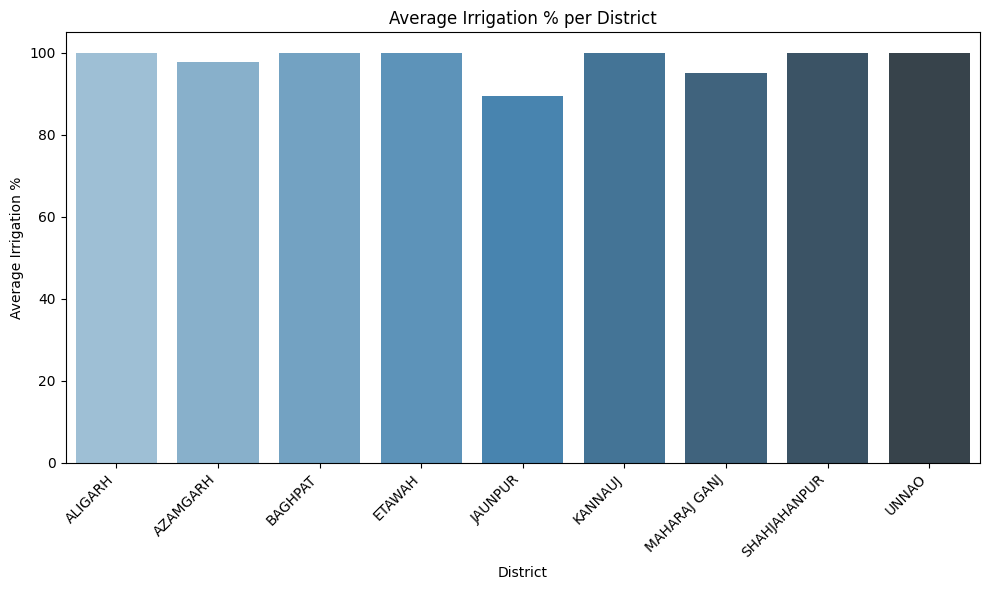

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark aggregation to Pandas if not done already
avg_irrigation_pd = df_clean.groupBy("district_name") \
    .agg(round(avg("irrigation_pct"), 2).alias("avg_irrigation_pct")) \
    .orderBy("district_name").toPandas()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="district_name", y="avg_irrigation_pct", data=avg_irrigation_pd, palette="Blues_d")
plt.xticks(rotation=45, ha='right')
plt.title("Average Irrigation % per District")
plt.ylabel("Average Irrigation %")
plt.xlabel("District")
plt.tight_layout()
plt.show()

### The above plot give summary of Which districts have higher irrigation

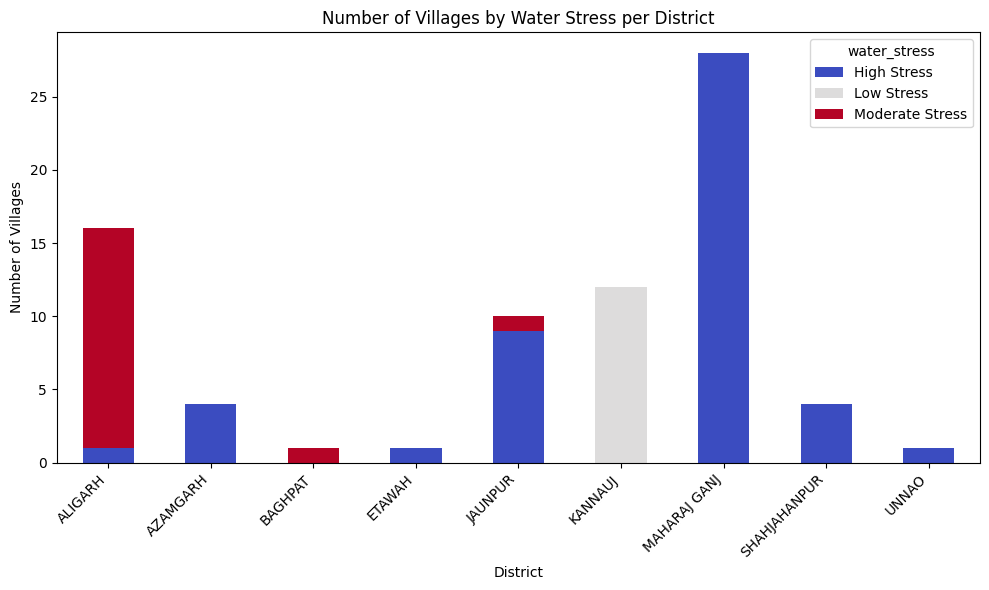

In [44]:
# Prepare data
water_stress_pd = df_clean.groupBy("district_name", "water_stress") \
    .count().toPandas()

# Pivot for stacked bar
water_stress_pivot = water_stress_pd.pivot(index="district_name", columns="water_stress", values="count").fillna(0)

# Plot
water_stress_pivot.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")
plt.title("Number of Villages by Water Stress per District")
plt.ylabel("Number of Villages")
plt.xlabel("District")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### The above plot gives info of Where are villages under water stress

C:\Users\vinay\AppData\Local\Temp\ipykernel_5804\1359883026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="block_tehsil_name", y="total_net_irrigated_area", data=total_irrigation_block_pd, palette="Greens_d")


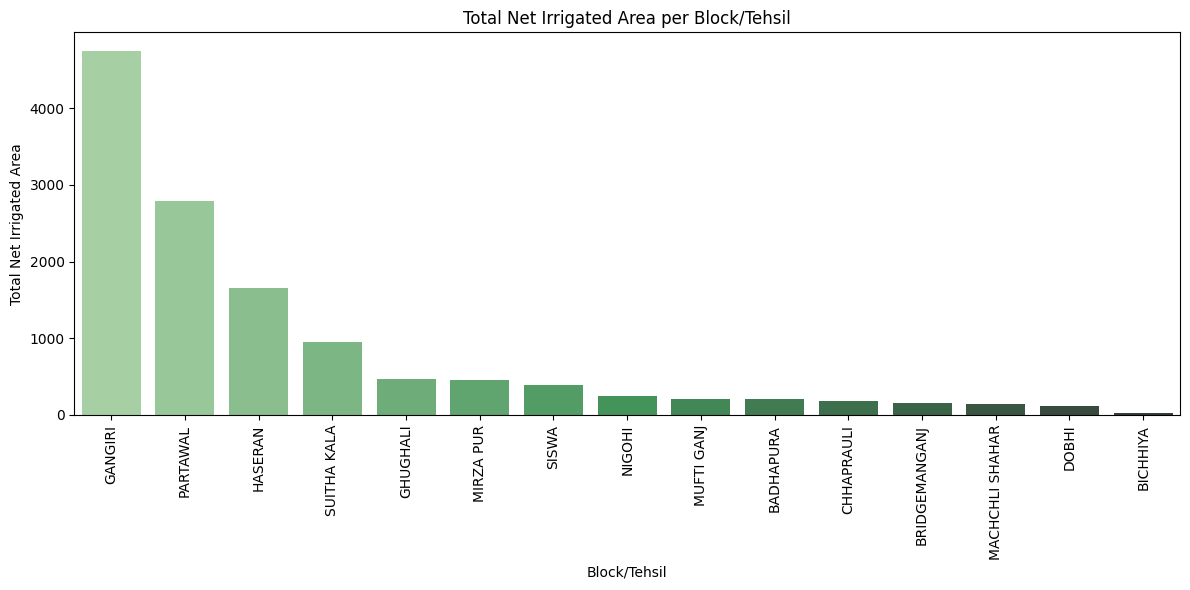

In [45]:
total_irrigation_block_pd = df_clean.groupBy("block_tehsil_name") \
    .agg(_sum("net_irrigated_area").alias("total_net_irrigated_area")) \
    .orderBy("total_net_irrigated_area", ascending=False).toPandas()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="block_tehsil_name", y="total_net_irrigated_area", data=total_irrigation_block_pd, palette="Greens_d")
plt.xticks(rotation=90)
plt.title("Total Net Irrigated Area per Block/Tehsil")
plt.ylabel("Total Net Irrigated Area")
plt.xlabel("Block/Tehsil")
plt.tight_layout()
plt.show()


### The above plot talks about Which blocks/tehsils have the most irrigated area

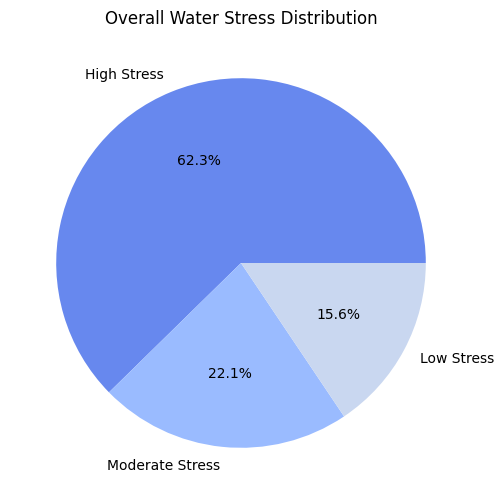

In [48]:
water_stress_overall = df_clean.groupBy("water_stress").count().toPandas()

plt.figure(figsize=(6,6))
plt.pie(water_stress_overall['count'], labels=water_stress_overall['water_stress'], autopct='%1.1f%%', colors=sns.color_palette("coolwarm"))
plt.title("Overall Water Stress Distribution")
plt.show()


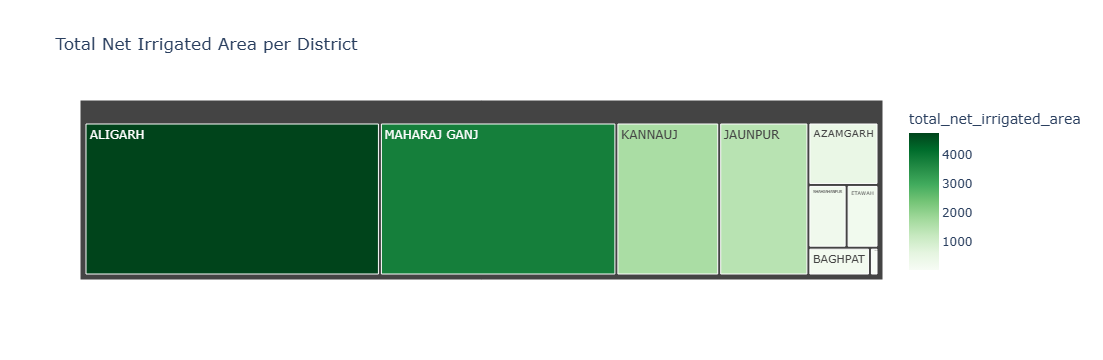

In [53]:
import plotly.express as px

# Aggregate total net irrigated area per district
district_irrigation = df_clean.groupBy("district_name") \
    .agg(_sum("net_irrigated_area").alias("total_net_irrigated_area")) \
    .orderBy("total_net_irrigated_area", ascending=False).toPandas()

# Treemap
fig = px.treemap(
    district_irrigation,
    path=['district_name'],  # hierarchy (just districts here)
    values='total_net_irrigated_area',
    color='total_net_irrigated_area',
    color_continuous_scale='Greens',
    title='Total Net Irrigated Area per District'
)
fig.show()


## CONCLUSION

The Minor Irrigation Census Analysis using Apache Spark transcends traditional data analysis by building an integrated data intelligence platform for irrigation management and water resource monitoring. It effectively demonstrates how cutting-edge distributed technologies can address critical challenges in agriculture and groundwater conservation, enabling data-backed decision-making.

This project is a testament to the power of technology in social and environmental development, providing not only analytical insights but also a blueprint for sustainable water governance. By leveraging big data to illuminate patterns of irrigation efficiency and groundwater stress, it contributes meaningfully to the vision of data-driven agricultural sustainability.

More than a technical milestone, this project serves as a catalyst for informed resource planning and evidence-based policy action, paving the way toward a more efficient, transparent, and resilient irrigation ecosystem.